In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [3]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    

In [4]:
session=cv2.imread("session.jpg",0)

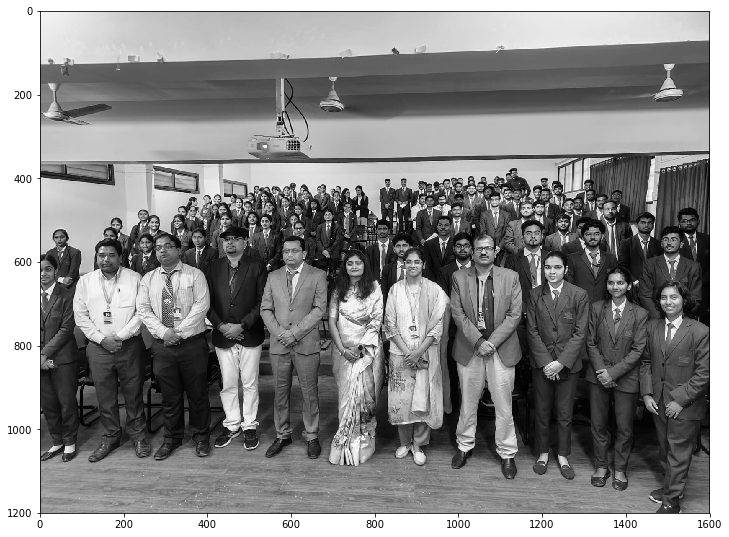

In [5]:
display(session)

In [6]:
person=cv2.imread("person_1.jpg",0)

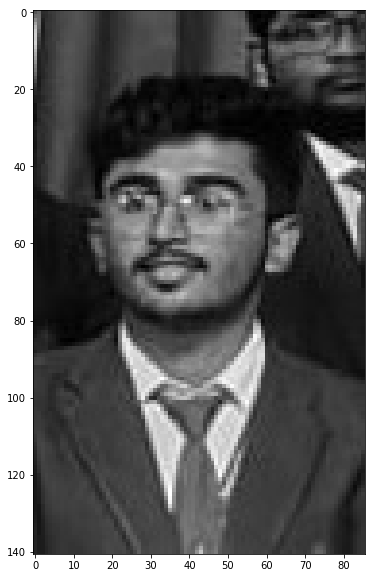

In [7]:
display(person)

In [8]:
sift=cv2.xfeatures2d.SIFT_create()

In [9]:
kp1,des1=sift.detectAndCompute(session,None)
kp2,des2=sift.detectAndCompute(person,None)

In [10]:
#FLANN paramteres
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm= FLANN_INDEX_KDTREE,trees=5)
search_params= dict(checks=80)
flann= cv2.FlannBasedMatcher(index_params,search_params)

matches=flann.knnMatch(des1,des2,k=2)

# Apply the ratio test to filter out poor matches
good = []
for match1, match2 in matches:
    if match1.distance < 0.5 * match2.distance:
        good.append([match1])
# The ratio test helps filter out false matches.
# It compares the distance of the closest match (match1) to the distance of the second closest match (match2).
# If the distance of match1 is less than 0.75 times the distance of match2,
# the match is considered good and is added to the 'good' list.

# Draw the matches using cv2.drawMatchesKnn, which expects a list of lists as matches
flan_matches = cv2.drawMatchesKnn(session, kp1, person, kp2, good, None, flags=2)
# cv2.drawMatchesKnn draws the matches between the keypoints of the two images.

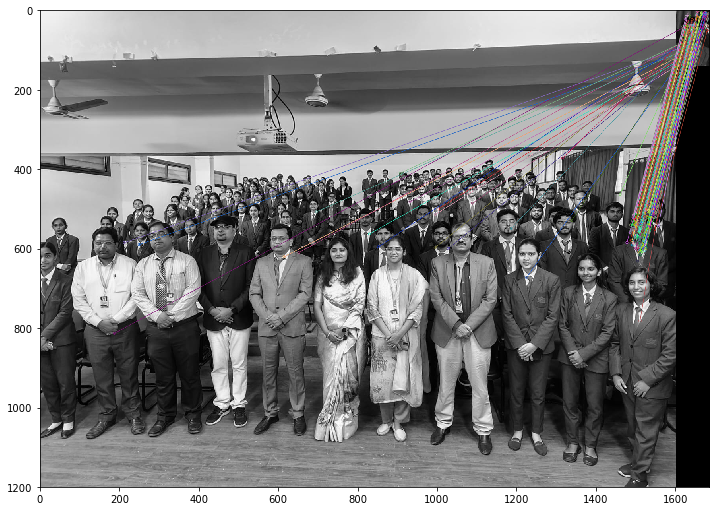

In [30]:
display(flan_matches)